# Monitor the Training Process

1. Regression task
2. Optimization: gradient descent
3. Overfitting
4. Improve the model performance

# 1. Outline the problem

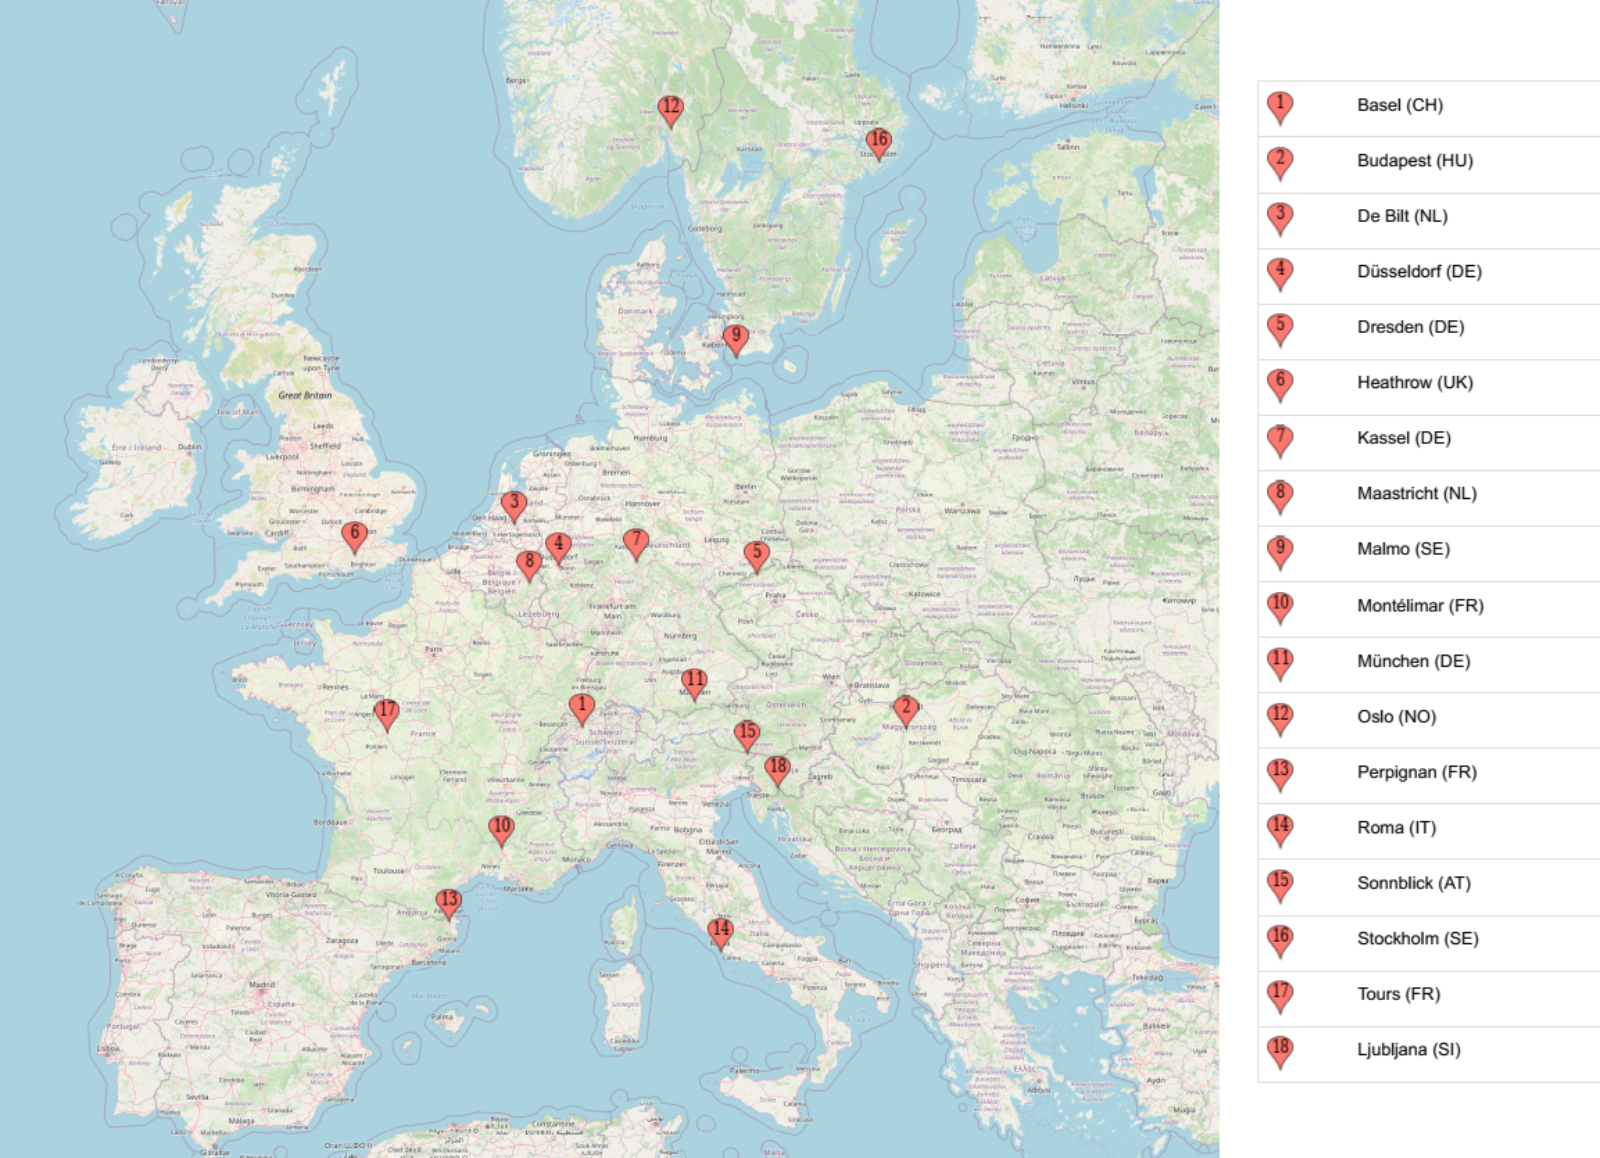

Predict tomorrow's sunshine hours for Basel

# 2. Identify inputs and outputs

In [1]:
import pandas as pd

filename_data = "weather_prediction_dataset_light.csv"
data = pd.read_csv(filename_data)
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-15.2,-17.0,-13.4,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,-13.7,-15.0,-12.3,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-9.2,-12.5,-5.8,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,-5.6,-7.0,-4.2,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-7.6,-9.4,-5.8,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [2]:
data.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max',
       'DE_BILT_cloud_cover', 'DE_BILT_humidity', 'DE_BILT_pressure',
       'DE_BILT_global_radiation', 'DE_BILT_precipitation', 'DE_BILT_sunshine',
       'DE_BILT_temp_mean', 'DE_BILT_temp_min', 'DE_BILT_temp_max',
       'DRESDEN_cloud_cover', 'DRESDEN_humidity', 'DRESDEN_global_radiation',
       'DRESDEN_precipitation', 'DRESDEN_sunshine', 'DRESDEN_temp_mean',
       'DRESDEN_temp_min', 'DRESDEN_temp_max', 'DUSSELDORF_cloud_cover',
       'DUSSELDORF_humidity', 'DUSSELDORF_pressure',
       'DUSSELDORF_global_radiation', 'DUSSELDORF_precipitation',
       'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min',
       'DUSSELDORF_temp_max', 'HEATHROW_cloud_cover', 'HEATHROW_humidity',
       'HEATHROW_pressure', 'HEATHROW_global_radiation',
       'HEATH

In [3]:
data.shape

(3654, 91)

# 3. Prepare Data

In [4]:
nr_rows = 365*3

X_data = data.loc[:nr_rows]
X_data = X_data.drop(columns=['DATE', 'MONTH'])

In [5]:
y_data = data.loc[1:(nr_rows+1)]["BASEL_sunshine"]

Split data training, validation, and test set

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_holdout, y_train, y_holdout = train_test_split(X_data, y_data, test_size = 0.3, random_state = 0)

In [7]:
X_holdout.shape

(329, 89)

In [8]:
X_val, X_test, y_val, y_test = train_test_split(X_holdout, y_holdout, test_size=0.5, random_state = 0)

# 4. Build our architecture

In [9]:
from tensorflow import keras

def create_nn():
    #Input layer
    inputs = keras.Input(shape=(X_data.shape[1],), name='input')
    
    #Hidden dense layers
    layers_dense_1 = keras.layers.Dense(100, 'relu')(inputs)
    layers_dense_2 = keras.layers.Dense(50, 'relu')(layers_dense_1)
    
    #Output layer
    outputs = keras.layers.Dense(1)(layers_dense_2)
    
    return keras.Model(inputs=inputs, outputs=outputs, name="weather_prediction_model")

In [10]:
model = create_nn()

In [11]:
model

In [12]:
model.summary()

Model: "weather_prediction_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 89)]              0         
                                                                 
 dense (Dense)               (None, 100)               9000      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 14101 (55.08 KB)
Trainable params: 14101 (55.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


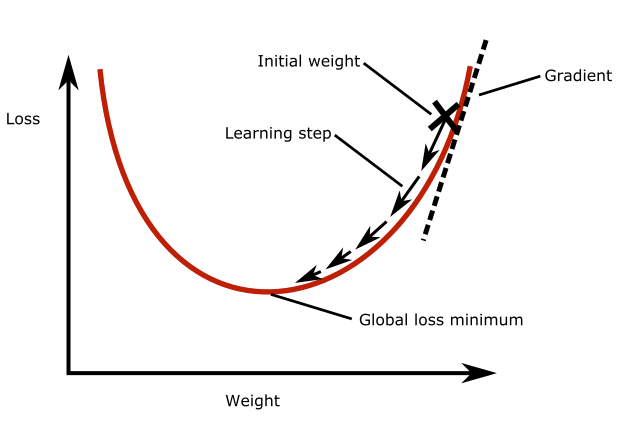

# 5. Choose a loss function and optimizer

In [13]:
def compile_model(model):
    model.compile(loss='mse', 
                  optimizer='adam', 
                  metrics=[keras.metrics.RootMeanSquaredError()])

compile_model(model)

# 6. Train the model

In [14]:
history = model.fit(X_train, y_train, batch_size=32, epochs=200, verbose=2)

Epoch 1/200
24/24 - 0s - loss: 16.3663 - root_mean_squared_error: 4.0455 - 164ms/epoch - 7ms/step
Epoch 2/200
24/24 - 0s - loss: 12.7865 - root_mean_squared_error: 3.5758 - 14ms/epoch - 581us/step
Epoch 3/200
24/24 - 0s - loss: 12.0091 - root_mean_squared_error: 3.4654 - 14ms/epoch - 586us/step
Epoch 4/200
24/24 - 0s - loss: 11.2168 - root_mean_squared_error: 3.3491 - 15ms/epoch - 615us/step
Epoch 5/200
24/24 - 0s - loss: 10.6811 - root_mean_squared_error: 3.2682 - 15ms/epoch - 618us/step
Epoch 6/200
24/24 - 0s - loss: 11.1120 - root_mean_squared_error: 3.3335 - 14ms/epoch - 601us/step
Epoch 7/200
24/24 - 0s - loss: 10.4399 - root_mean_squared_error: 3.2311 - 15ms/epoch - 630us/step
Epoch 8/200
24/24 - 0s - loss: 10.2372 - root_mean_squared_error: 3.1996 - 14ms/epoch - 581us/step
Epoch 9/200
24/24 - 0s - loss: 10.0477 - root_mean_squared_error: 3.1698 - 16ms/epoch - 650us/step
Epoch 10/200
24/24 - 0s - loss: 9.6414 - root_mean_squared_error: 3.1051 - 15ms/epoch - 636us/step
Epoch 11/20

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

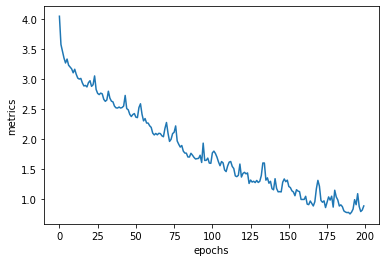

In [16]:
def plot_history(history, metrics):
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics])
    plt.xlabel("epochs")
    plt.ylabel("metrics")
    
plot_history(history, 'root_mean_squared_error')

# 7. Perform a prediction

In [19]:
y_test_predicted = model.predict(X_test)
y_train_predicted = model.predict(X_train)

24/24 [==============================] - 0s 437us/step


## 8. Measure performance

In [18]:
def plot_predictions(y_pred, y_true, title):
    plt.style.use('ggplot')
    plt.scatter(y_pred, y_true, s=10, alpha=0.5)
    plt.xlabel('predicted sunshine hours')
    plt.ylabel('True sunshine hours')
    plt.title(title)

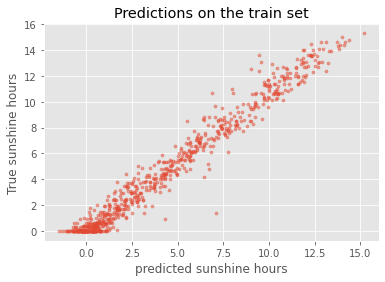

In [20]:
plot_predictions(y_train_predicted, y_train,
                 title='Predictions on the train set')

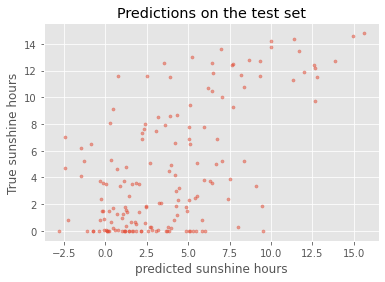

In [21]:
plot_predictions(y_test_predicted, y_test,
                 title='Predictions on the test set')

## Exercise: Reflecting on our results (in breakout rooms)
* Is the performance of the model as you expected (or better/worse)?
* Is there a noteable difference between training set and test set? And if so, any idea why?
* (Optional) When developing a model, you will often vary different aspects of your model like which features you use, model parameters and architecture. It is important to settle on a single-number ev (aluation metric to compare your models.
    * What single-number evaluation metric would you choose here and why?

In [24]:
train_metrics = model.evaluate(X_train, y_train, return_dict=True)
test_metrics = model.evaluate(X_test, y_test, return_dict=True)
print('train', train_metrics)
print('test', test_metrics)

6/6 [==============================] - 0s 802us/step - loss: 14.3313 - root_mean_squared_error: 3.7857
train {'loss': 0.7696030139923096, 'root_mean_squared_error': 0.8772702217102051}
test {'loss': 14.331304550170898, 'root_mean_squared_error': 3.7856709957122803}


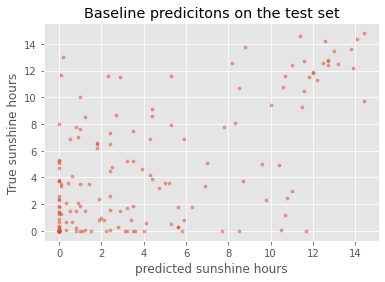

In [25]:
y_baseline_prediction = X_test['BASEL_sunshine']
plot_predictions(y_baseline_prediction, y_test,
                 title='Baseline predicitons on the test set')

In [26]:
from sklearn.metrics import mean_squared_error
rmse_baseline = mean_squared_error(y_test, y_baseline_prediction,
                                   squared=False)

In [27]:
rmse_baseline

3.877323350410224

Looking at this baseline: Would you consider this a simple or a hard problem to solve?


Monte-carlo simulations

## 9. Refine the model

In [33]:
model = create_nn()
compile_model(model)

In [34]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=200,
                    validation_data=(X_val, y_val))

Epoch 1/200
24/24 [==============================] - 0s 3ms/step - loss: 25.3795 - root_mean_squared_error: 5.0378 - val_loss: 17.1460 - val_root_mean_squared_error: 4.1408
Epoch 2/200
24/24 [==============================] - 0s 1ms/step - loss: 15.2470 - root_mean_squared_error: 3.9047 - val_loss: 13.4556 - val_root_mean_squared_error: 3.6682
Epoch 3/200
24/24 [==============================] - 0s 1ms/step - loss: 13.6534 - root_mean_squared_error: 3.6951 - val_loss: 12.5642 - val_root_mean_squared_error: 3.5446
Epoch 4/200
24/24 [==============================] - 0s 1ms/step - loss: 12.2215 - root_mean_squared_error: 3.4959 - val_loss: 11.5469 - val_root_mean_squared_error: 3.3981
Epoch 5/200
24/24 [==============================] - 0s 1ms/step - loss: 11.5870 - root_mean_squared_error: 3.4040 - val_loss: 11.9330 - val_root_mean_squared_error: 3.4544
Epoch 6/200
24/24 [==============================] - 0s 1ms/step - loss: 11.4448 - root_mean_squared_error: 3.3830 - val_loss: 11.6696 

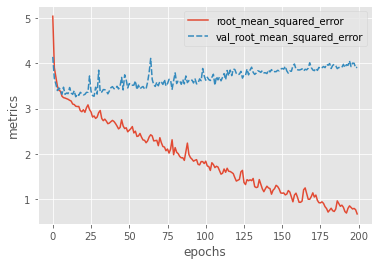

In [35]:
plot_history(history, ['root_mean_squared_error',
                       'val_root_mean_squared_error'])

## Exercise: plot the training progress 
1. Is there a difference between the training curves of training versus validation data? And if so, what would this imply?
2. (Optional) Take a pen and paper, draw the perfect training and validation curves.
(This may seem trivial, but it will trigger you to think about what you actually would like to see)

## Exercise: (in breakout rooms) Try to reduce the degree of overfitting by lowering the number of parameters
We can keep the network architecture unchanged (2 dense layers + a one-node output layer) and only play with the number of nodes per layer.
Try to lower the number of nodes in one or both of the two dense layers and observe the changes to the training and validation losses.
If time is short: Suggestion is to run one network with only 10 and 5 nodes in the first and second layer.

* Is it possible to get rid of overfitting this way?
* Does the overall performance suffer or does it mostly stay the same?
* How low can you go with the number of parameters without notable effect on the performance on the validation set?


In [45]:
def create_nn(nodes1=100, nodes2=50): # Added arguments
   # Input layer
   inputs = keras.layers.Input(shape=(X_data.shape[1],), name='input')
   # Dense layers
   layers_dense = keras.layers.Dense(nodes1, 'relu')(inputs)
   layers_dense = keras.layers.Dense(nodes2, 'relu')(layers_dense)
   # Output layer
   outputs = keras.layers.Dense(1)(layers_dense)
   return keras.Model(inputs=inputs, outputs=outputs, name="model_small")

In [46]:
model = create_nn(3, 3) # Adding different number of nodes here

In [47]:
compile_model(model)
history = model.fit(X_train, y_train,
                   batch_size = 32,
                   epochs = 200,
                   validation_data=(X_val, y_val))


Epoch 1/200
24/24 [==============================] - 0s 3ms/step - loss: 49.5459 - root_mean_squared_error: 7.0389 - val_loss: 27.0199 - val_root_mean_squared_error: 5.1981
Epoch 2/200
24/24 [==============================] - 0s 1ms/step - loss: 20.2184 - root_mean_squared_error: 4.4965 - val_loss: 17.1573 - val_root_mean_squared_error: 4.1421
Epoch 3/200
24/24 [==============================] - 0s 1ms/step - loss: 17.4386 - root_mean_squared_error: 4.1760 - val_loss: 15.4116 - val_root_mean_squared_error: 3.9258
Epoch 4/200
24/24 [==============================] - 0s 1ms/step - loss: 16.6879 - root_mean_squared_error: 4.0851 - val_loss: 15.0666 - val_root_mean_squared_error: 3.8816
Epoch 5/200
24/24 [==============================] - 0s 1ms/step - loss: 16.2994 - root_mean_squared_error: 4.0373 - val_loss: 14.7323 - val_root_mean_squared_error: 3.8383
Epoch 6/200
24/24 [==============================] - 0s 1ms/step - loss: 15.9475 - root_mean_squared_error: 3.9934 - val_loss: 14.5356 

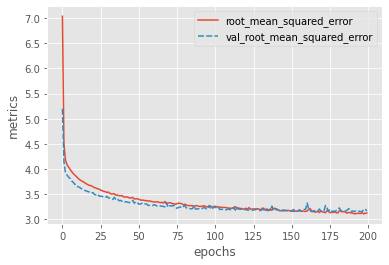

In [48]:
plot_history(history, ['root_mean_squared_error',
                       'val_root_mean_squared_error'])

In [49]:
model = create_nn()
compile_model(model)

In [50]:
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
earlystopper = EarlyStopping(
    monitor='val_loss',
    patience=10)

In [53]:
history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs=200,
                    validation_data=(X_val, y_val),
                    callbacks=[earlystopper]) # this is new

Epoch 1/200
24/24 [==============================] - 0s 3ms/step - loss: 18.3827 - root_mean_squared_error: 4.2875 - val_loss: 13.5024 - val_root_mean_squared_error: 3.6746
Epoch 2/200
24/24 [==============================] - 0s 1ms/step - loss: 13.9359 - root_mean_squared_error: 3.7331 - val_loss: 13.8001 - val_root_mean_squared_error: 3.7149
Epoch 3/200
24/24 [==============================] - 0s 1ms/step - loss: 12.7878 - root_mean_squared_error: 3.5760 - val_loss: 12.8801 - val_root_mean_squared_error: 3.5889
Epoch 4/200
24/24 [==============================] - 0s 1ms/step - loss: 11.3966 - root_mean_squared_error: 3.3759 - val_loss: 11.6543 - val_root_mean_squared_error: 3.4138
Epoch 5/200
24/24 [==============================] - 0s 1ms/step - loss: 11.4061 - root_mean_squared_error: 3.3773 - val_loss: 11.7188 - val_root_mean_squared_error: 3.4233
Epoch 6/200
24/24 [==============================] - 0s 1ms/step - loss: 10.7798 - root_mean_squared_error: 3.2833 - val_loss: 11.6764 

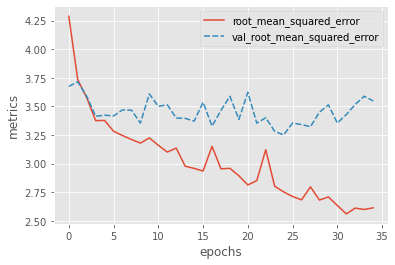

In [55]:
plot_history(history, ['root_mean_squared_error',
                       'val_root_mean_squared_error'])

In [56]:
X_train.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,DE_BILT_cloud_cover,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
458,7,0.73,1.0194,0.73,0.00,0.0,11.0,7.8,13.9,6,...,-1.8,-4.0,0.5,0.68,1.0161,1.36,0.46,13.1,9.9,16.3
181,2,0.54,1.0154,3.24,0.00,12.9,18.8,10.4,26.0,3,...,0.9,-2.1,3.8,0.74,1.0134,2.59,0.00,19.9,13.9,25.9
427,7,0.91,0.9929,0.28,1.47,0.0,1.5,0.8,2.5,5,...,-10.3,-15.7,-4.9,0.89,0.9913,0.40,0.52,4.0,1.9,6.0
815,1,0.64,1.0274,2.14,0.00,10.9,3.0,-3.4,9.3,6,...,-14.6,-15.5,-13.6,0.66,1.0277,1.92,0.00,6.4,-0.2,12.9
9,8,0.91,1.0337,0.06,0.09,0.0,2.4,1.4,3.8,3,...,-13.3,-15.0,-11.6,0.94,1.0369,0.58,0.04,1.8,-1.5,5.0


In [58]:
# from tensorflow import keras
# from tensorflow.keras.layers import BatchNormalization
# BatchNormalization()

def create_nn():
    #Input layer
    inputs = keras.Input(shape=(X_data.shape[1],), name='input')
    
    #Hidden dense layers
    batchnorm_layer = keras.layers.BatchNormalization()(inputs) # Add a new layer
    layers_dense_1 = keras.layers.Dense(100, 'relu')(batchnorm_layer)
    layers_dense_2 = keras.layers.Dense(50, 'relu')(layers_dense_1)
    
    #Output layer
    outputs = keras.layers.Dense(1)(layers_dense_2)
    
    return keras.Model(inputs=inputs, outputs=outputs,
                       name="model_batchnorm")

In [59]:
model = create_nn()
compile_model(model)
model.summary()

Model: "model_batchnorm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 89)]              0         
                                                                 
 batch_normalization (Batch  (None, 89)                356       
 Normalization)                                                  
                                                                 
 dense_24 (Dense)            (None, 100)               9000      
                                                                 
 dense_25 (Dense)            (None, 50)                5050      
                                                                 
 dense_26 (Dense)            (None, 1)                 51        
                                                                 
Total params: 14457 (56.47 KB)
Trainable params: 14279 (55.78 KB)
Non-trainable params: 178 (712.00 Byte)
___________

In [60]:
history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs=200,
                    validation_data=(X_val, y_val),
                    callbacks=[earlystopper]) # this is new


Epoch 1/200
24/24 [==============================] - 0s 3ms/step - loss: 21.6672 - root_mean_squared_error: 4.6548 - val_loss: 252.8814 - val_root_mean_squared_error: 15.9022
Epoch 2/200
24/24 [==============================] - 0s 1ms/step - loss: 13.0170 - root_mean_squared_error: 3.6079 - val_loss: 68.7799 - val_root_mean_squared_error: 8.2934
Epoch 3/200
24/24 [==============================] - 0s 1ms/step - loss: 11.2793 - root_mean_squared_error: 3.3585 - val_loss: 40.5097 - val_root_mean_squared_error: 6.3647
Epoch 4/200
24/24 [==============================] - 0s 1ms/step - loss: 10.8390 - root_mean_squared_error: 3.2923 - val_loss: 28.5041 - val_root_mean_squared_error: 5.3389
Epoch 5/200
24/24 [==============================] - 0s 1ms/step - loss: 10.7720 - root_mean_squared_error: 3.2821 - val_loss: 15.8975 - val_root_mean_squared_error: 3.9872
Epoch 6/200
24/24 [==============================] - 0s 1ms/step - loss: 9.6146 - root_mean_squared_error: 3.1007 - val_loss: 16.3550

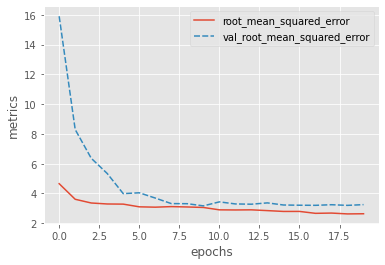

In [61]:
plot_history(history, ['root_mean_squared_error',
                       'val_root_mean_squared_error'])

In [62]:
from tensorflow.keras.callbacks import TensorBoard
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") # You can adjust this to add a more meaningful model name
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(X_train, y_train,
                   batch_size = 32,
                   epochs = 200,
                   validation_data=(X_val, y_val),
                   callbacks=[tensorboard_callback],
                   verbose = 2)

Epoch 1/200
24/24 - 0s - loss: 6.8597 - root_mean_squared_error: 2.6191 - val_loss: 11.0739 - val_root_mean_squared_error: 3.3277 - 98ms/epoch - 4ms/step
Epoch 2/200
24/24 - 0s - loss: 6.5875 - root_mean_squared_error: 2.5666 - val_loss: 12.0640 - val_root_mean_squared_error: 3.4733 - 48ms/epoch - 2ms/step
Epoch 3/200
24/24 - 0s - loss: 6.4910 - root_mean_squared_error: 2.5477 - val_loss: 10.9668 - val_root_mean_squared_error: 3.3116 - 47ms/epoch - 2ms/step
Epoch 4/200
24/24 - 0s - loss: 5.7240 - root_mean_squared_error: 2.3925 - val_loss: 10.8786 - val_root_mean_squared_error: 3.2983 - 48ms/epoch - 2ms/step
Epoch 5/200
24/24 - 0s - loss: 6.2346 - root_mean_squared_error: 2.4969 - val_loss: 10.8620 - val_root_mean_squared_error: 3.2958 - 48ms/epoch - 2ms/step
Epoch 6/200
24/24 - 0s - loss: 5.8035 - root_mean_squared_error: 2.4091 - val_loss: 11.0503 - val_root_mean_squared_error: 3.3242 - 46ms/epoch - 2ms/step
Epoch 7/200
24/24 - 0s - loss: 5.9031 - root_mean_squared_error: 2.4296 - va

In [63]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

## Notes for collaboration in groups
* See yourself as a team working together on this deep learning problem: members in the team have different expertise and experience. Together you need to solve the problem, but you also need to make sure that everyone understands what everyone is doing. You can decide to have different team members try out different things.
* If you feel like you go a bit faster than the rest in the group: share your screen and explain what you did.
* If you don't understand what other people in your group are doing: ask for clarification!

## Exercise: (in breakout rooms) Simplify the model and add data + next steps
You may have been wondering why we are including weather observations from
multiple cities to predict sunshine hours only in Basel. The weather is
a complex phenomenon with correlations over large distances and time scales,
but what happens if we limit ourselves to only one city?

1. Since we will be reducing the number of features quite significantly,
we should afford to include more data. Instead of using only 3 years, use
8 or 9 years!
2. Remove all cities from the training data that are not for Basel.
You can use something like:
```python
cols = [c for c in X_data.columns if c[:5] == 'BASEL']
X_data = X_data[cols]
```
3. Now rerun the last model we defined which included the BatchNorm layer.
Recreate the scatter plot comparing your prediction with the baseline
prediction based on yesterday's sunshine hours, and compute also the RMSE.
Note that even though we will use many more observations than previously,
the network should still train quickly because we reduce the number of
features (columns).
Is the prediction better compared to what we had before?

#### (Optional) What could be next steps to further improve the model?

With unlimited options to modify the model architecture or to play with the training parameters, deep learning can trigger very extensive hunting for better and better results.
Usually models are "well behaving" in the sense that small changes to the architectures also only result in small changes of the performance (if any).
It is often tempting to hunt for some magical settings that will lead to much better results. But do those settings exist?
Applying common sense is often a good first step to make a guess of how much better results *could* be.
In the present case we might certainly not expect to be able to reliably predict sunshine hours for the next day with 5-10 minute precision.
But how much better our model could be exactly, often remains difficult to answer.

4. What changes to the model architecture might make sense to explore?
5. Ignoring changes to the model architecture, what might notably improve the prediction quality?
6. (Optional) Try to train a model on all years that are available,
and all features from all cities. How does it perform?
7. (Optional) Try one of the most fruitful ideas you have. Does it improve the model?

In [64]:
model.save('weather_prediction_v1.0')

INFO:tensorflow:Assets written to: weather_prediction_v1.0/assets


INFO:tensorflow:Assets written to: weather_prediction_v1.0/assets


| MODEL NAME              | MODEL DESCRIPTION                          | RMSE | TESTSET NAME  | GITHUB COMMIT | COMMENTS  |
|-------------------------|--------------------------------------------|------|---------------|---------------|---|
| weather_prediction_v1.0 | Basel features only, 10 years. nn: 100-50  | 3.21 | 10_years_v1.0 |               |   |
| weather_prediction_v1.1 | all features, 10 years. nn: 100-50         | 3.35 | 10_years_v1.0 |               |   |

## Keypoints:
* Changing a hyperparameter (such as the number of nodes) and checking whether it improves performance is called **hyperparameter tuning**
* Use your validation data to refine the model and do hyperparameter tuning
* Use the test data only once in a while to evaluate your model
* **data hygeine**